In [1]:
import hpc 
import numpy as np
import matplotlib.pyplot as plt
import pykat as pk

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

                                              ..-
    PyKat 1.1.331         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
#basic init stuff 
sensor = hpc.CMOS_sensor(pixel_pitch=6.9e-6, x_resolution=720, y_resolution=540, exposure_time=4e-6, quantum_eff=0.03, pixel_well_depth=22187) 
# sensor = hpc.CMOS_sensor() will do the same thing, however just to show you how you can set different values upon initalization

# the sensor will generate arrays with the spatial location of each pixel. This is used when trying to produce intensity images,
# as you need these to define a gaussian beam.

x_array = sensor.x_array
y_array = sensor.y_array

In [3]:
#nice reference beam for interference
ref_beam = hpc.beam(power=1e-3, w0=1e-3, z=0, spatial="guass")
ref_beam_amp = ref_beam.generate_amplitude_map(x_array, y_array)

In [4]:
new_beam = hpc.beam(1e-3,1e-3,0,"guass")
new_beam_amp = new_beam.generate_amplitude_map(x_array,y_array)
PS_NB_amp = new_beam.phase_shift(new_beam_amp) #/Users/coleperkins/Desktop/UFPhaseCamera/smilePI.npy

Please enter file path to numpy phase shift array: 
None/Users/coleperkins/Desktop/UFPhaseCamera/smilePI.npy


Text(0.5, 1.0, 'Phase shifted amplitude')

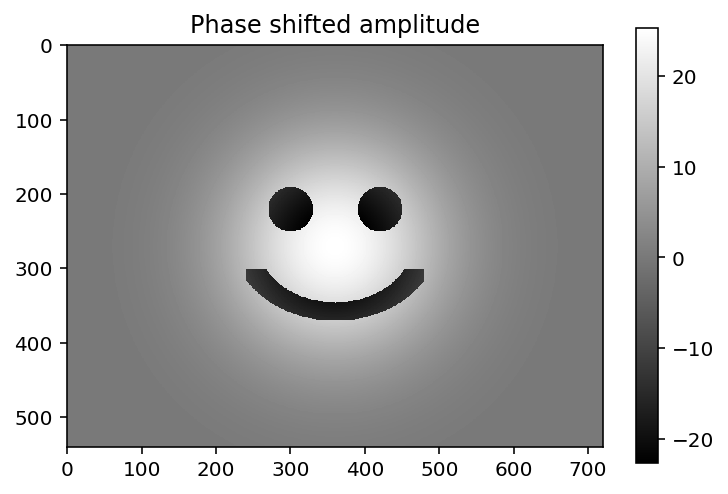

In [5]:
hpc.plot(np.real(PS_NB_amp))
plt.title('Phase shifted amplitude')

In [6]:
#create a beat note

#first invent time
time = hpc.time_array(no_images=81, collection_time=2)

#beat note
beat = hpc.generate_beatnote(PS_NB_amp, ref_beam_amp, 10, time)

In [7]:
#using camera to capture images
cam_beat = sensor.capture(1e-3*beat, 12, 81) 
#need to add noise to each image idividually, otherwise every pixel ij is changed the same for each image

#animate intensity images
hpc.animate_images(np.real(cam_beat), cmap='gray')

In [8]:
#phase maps
phase=hpc.novak(np.real(cam_beat))
hpc.animate_images(phase, cmap='jet', cbar_lim=2*np.pi)